In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.int32)

x_clean = tf.reshape(x, [-1, 28, 28, 1])
y_clean = tf.one_hot(y, 10)

In [4]:
cw0 = tf.Variable(tf.truncated_normal([3, 3, 1, 32]))
cb0 = tf.Variable(tf.zeros([32]))
# w0 = tf.Variable(tf.truncated_normal([784, 30]))
w0 = tf.Variable(tf.truncated_normal([784*32, 30]))
b0 = tf.Variable(tf.zeros([1, 30]))
w1 = tf.Variable(tf.truncated_normal([30, 10]))
b1 = tf.Variable(tf.zeros([1, 10]))


In [5]:
x0 = tf.layers.batch_normalization(x_clean)

x0 = tf.nn.conv2d(x0, cw0, (1, 1, 1, 1), 'SAME')
x0 = tf.nn.bias_add(x0, cb0)

# x0 = tf.reshape(x0, [-1, 784])
x0 = tf.reshape(x0, [-1, 784*32])


z0 = tf.matmul(x0, w0) + b0

# a0 = tf.nn.relu(z0)
a0 = tf.nn.sigmoid(z0)

a0 = tf.layers.batch_normalization(a0)

z = tf.matmul(a0, w1) + b1

In [6]:
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_clean, logits=z)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_clean, axis=1), tf.argmax(z, axis=1)), tf.float32))

opt = tf.train.AdamOptimizer().minimize(loss)

init = tf.global_variables_initializer()

In [7]:
def gen_data(x, y, batch_size=1024):
    for i in range(0, len(x), batch_size):
        yield x[i:i+batch_size], y[i:i+batch_size]

In [8]:
se = tf.Session()
se.run(init)

In [9]:
epochs = 30
L, A, VL, VA = [], [], [], []
for i in range(epochs):
    tmp_L, tmp_A = [], []
    for x_, y_ in gen_data(x_train, y_train):
        _, l, a = se.run([opt, loss, acc], feed_dict={x: x_, y: y_})
        tmp_L.append(np.mean(l))
        tmp_A.append(np.mean(a))
    L.append(np.mean(tmp_L))
    A.append(np.mean(tmp_A))
    
    tmp_VL, tmp_VA = [], []
    for x_, y_ in gen_data(x_test, y_test):
        vl, va = se.run([loss, acc], feed_dict={x: x_, y: y_})
        tmp_VL.append(np.mean(vl))
        tmp_VA.append(np.mean(va))
    VL.append(np.mean(tmp_VL))
    VA.append(np.mean(tmp_VA))
    print(i, end=', ',)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

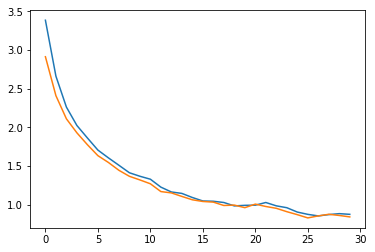

In [10]:
plt.plot(L, label='loss')
plt.plot(VL, label='val_loss')

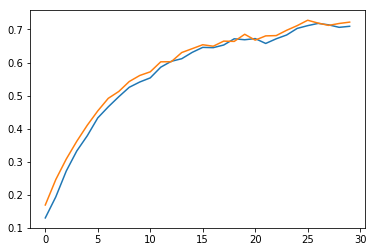

In [11]:
plt.plot(A, label='acc')
plt.plot(VA, label='val_acc')

In [12]:
ids = random.sample(range(len(x_test)), 10)

In [13]:
y_pred = np.argmax(se.run(z, feed_dict={x: x_test[ids]}), axis=1)

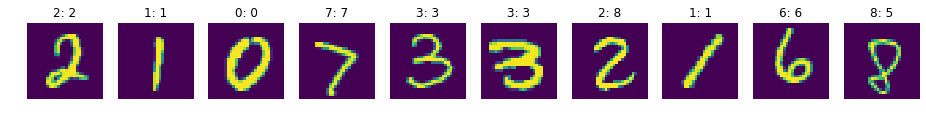

In [14]:
fig = plt.figure(figsize=(16, 4))
for index, value in enumerate(ids):
    fig.add_subplot(1, 10, index+1)
    plt.axis('off')
    plt.title('{}: {}'.format(y_test[value], y_pred[index]))
    plt.imshow(x_test[value].reshape([28, 28]))

In [15]:
tmp_VL, tmp_VA = [], []
for x_, y_ in gen_data(x_test, y_test):
    vl, va = se.run([loss, acc], feed_dict={x: x_, y: y_})
    tmp_VL.append(np.mean(vl))
    tmp_VA.append(np.mean(va))
print(np.mean(tmp_VL), np.mean(tmp_VA))

0.8424312 0.72222775
